# Information Theory and Wordle 1/2 (Python)

### Overview
- Introduction to information theory: definitions, Entropy function, the unit 'bit'.
- Using information theory in the game Wordle

In [1]:
#Imports
from math import log2
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy

### Information Theory 
According to Wikipedia, Information theory is "the study of the quantification, storage, and communication of digital information." Today is focused on the "quantification" part of information, which stems from the field of probability and statistics.

The main question in information theory is: given a discrete random variable, $x$, how much information is received when we observe a specific value for this variable and how is this quantifiable?

The amount of information is measured by an entropy function denoted $h(x)$ which returns some number of "bits". One can think of entropy as a measure of surprise on learning the value of $x$. Unexpected events (low probability events) provide more information, and thus have a higher entropy than expected events (high probability events). For an event $x$, if $p(x)=1$, or the event occurring is certain than $H(x)=0$.

### Measuring Information with the Entropy Function H(x) 
- The unit of information is called a 'bit' or "binary digit." If an observation cuts the probability space in half, then this observation has 1 bit. If it cuts the probability space in a quarter, then this observation has 2 bits and so on. *(This idea of the bit will be useful when solving Wordle)*
- 'Shannon Entropy' denoted $H$ is a monotonic function of the probability $p(x)$ which returns the number of bits yielded for an event, $$H(x) = -\sum_{x} p(x)\log_2 p(x)$$ When $p(x)=0$ the log part of the expression is undefined, so by convention set $p(x)\log_2p(x)=0$ in this case. The negative sign in front of the summation is so that the function returns a non-negative value (probabilities range between 0 and 1 and the $log_2$ function is negative from 0 to 1). The choice of the base of the log is arbitrary but the convention is to use base 2. 


### Example 
Entropy associated with a single flip of a fair coin.
For a fair coin, there is equal probability of landing a heads or a tails so the probability of a given event of landing heads or landing tails is $\frac{1}{2}$. So the entropy of x if x has probability of $\frac{1}{4}$ is considered more surprising in this context and thus should have a higher entropy. 

Computing $H(x)$ for $p(x) = 1, .5, .25$

In [2]:
-log2(.25)

2.0

In [3]:
-log2(.5)

1.0

In [4]:
-log2(1)

-0.0

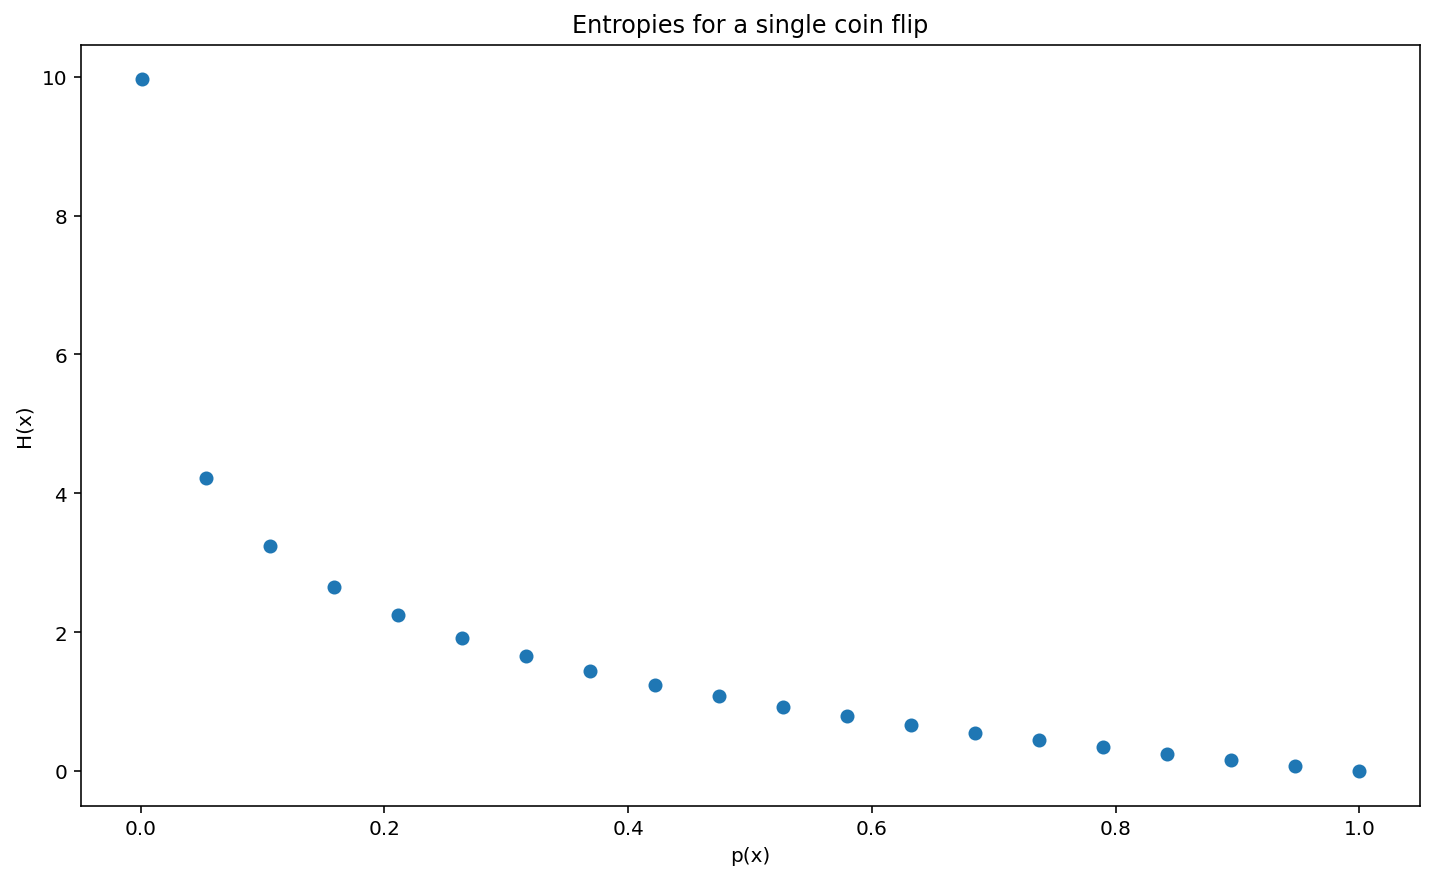

In [5]:
p = np.linspace(.001, 1, num=20)
h = [-log2(i) for i in p]

fig, ax = plt.subplots()
ax.plot(p,h, 'o')
ax.set(xlabel='p(x)', ylabel = 'H(x)', title = 'Entropies for a single coin flip')
plt.show()

As seen in the above plot, the entropy is monotonically decreasing with the highest value of entropy occurs when p(x)=0 and the lowest value of entropy occurs when p(x)=1.

### Wordle
- Players have six attempts to guess a five-letter word. After each guess, the following information is given:
    - a tile is grey if that letter does not appear in the correct word
    - a tile is yellow if that letter does appear in the correct word but in a different location
    - a tile is green if that letter is in the word and is in the correct location

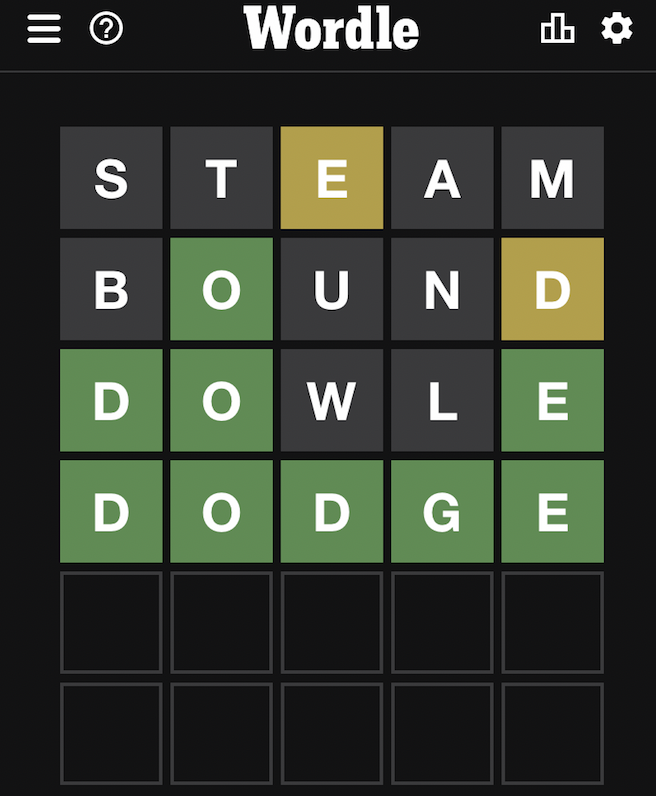

In the first guess, only one letter is in the word but it's not in the right location. Event hough four of the letter tiles are grey, those still provide information - namely that they are not good letters to choose for the next guess. In my second guess, I try  a word with 5 completely different letters and gain the information that 'O' is in the word at the second position, and 'D' is somewhere in the word in either the first, third or fourth postion. In the third guess I try a word with a different ordering of D,O,E and get the information that the word looks something like 'D O _ _ E'. Lastly, I guess the best word I can and it turns out to be correct.

### Example
A simplified version for how colors are assigned in Wordle. The function below takes in a word guess and actual answer
returns the corresponding color matching with 0 for grey (letter is not in the word at all), 1 for yellow (the letter is in the word but in the wrong position) and 2 for green (the letter is in the right position). 

The actual method for assigning colors is a bit more complicated due to certain edge cases (which i will describe in the reuslts of the next notebook) 

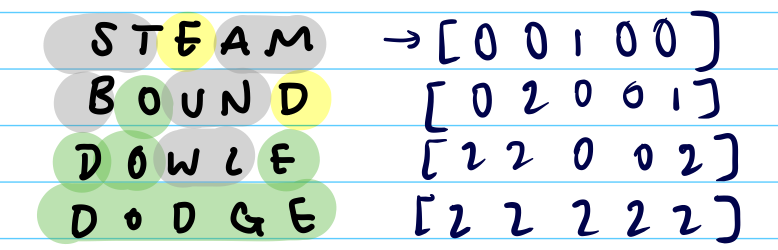

In [6]:
def coloring(guess, answer):
    result = []
    answer = list(answer) # turns word into a vector of characters
    guess = list(guess)
    for i in range(0,5):
        #green
        if answer[i]==guess[i]:
            result+=[2]
        #yellow
        elif guess[i] in answer:
            result+=[1]
        #grey
        else:
            result+=[0]
    return result

In [7]:
print(coloring("steam", "dodge"))

[0, 0, 1, 0, 0]


In [8]:
print(coloring("bound", "dodge"))

[0, 2, 0, 0, 1]


In [9]:
print(coloring("dowle", "dodge"))

[2, 2, 0, 0, 2]


In [10]:
print(coloring("dodge", "dodge"))

[2, 2, 2, 2, 2]


## How does information theory relate to this game?

The objective of Wordle is to guess the correct word for the day. Information theory can be used to find the word guess among ~13,000 possible words which has the most likelihood of being an answer. 

 1. Quantifying how much information is gained by a given guess, i.e. find the expected information gained by choosing that word  
    - Expected amount of information from a given guess: $E[I] = -\sum_x p(x) \log_2{p(x)}$
 2. Finding which word guess among the possible word guesses maximizes the information gain (has the highest entropy)

Let's try answering the first item. In order to do this we need to compute the number of bits which are gained by a given guess. For simplicity, we will assume that all possible word guesses have equal likelihood of being the answer. 

For a given guess, there are three possibilities for a letter color (grey, yellow, green) thus $3^5=243$ possible colorings for a given word. So each guess gives $\log_2(243)$ or ~8 bits of information.

In [11]:
# bits of info gained from a given guess
log2(243)

7.924812503605781

Since there are about $13,000$ possible words to choose from, the information content of choosing one of those words is $log_2(13,000)$ ~ 14 bits of information

In [12]:
# starting bits of information
log2(13000)

13.66622400280318

### Remaining uncertainty after a guess
- Remaining uncertainty after first guess is $14-8 = 6$ bits
- Remaining uncertainty after the second guess is $6-8 = -2$ bits
So it seems the game can be solved easily by the second guess there is already no uncertainty left. 

However this is certainly not the case as some people might know from experience. This is due to the fact that this definition of information is giving an upper bound on how much information a guess can give since it is treating $3^5$ combinations of tile colorings equally likely. So a different approach to measuring information gain by a given word guess must be taken. 

### Finding the most 'helpful' word

Going back to the interpretation of 1 bit as meaning an observation that reduces the probability space by one half, 2 bits by one fourth, 3 bits by one eigth etc. , the most useful words are the words that reduce the remaining possible word space the most.

A (discrete) variable has maximum entropy when all outcomes are equally likely, so the best word guess should be the word that evenly divides the outcome space. Since there are $13,000$ words and 243 orderings, the best word will be one that divides the outcome space so that there are $\frac{13,000}{243}$~$53$ words per coloring.

In the next notebook we will figure out how to find the word with maximal entropy (maximal information gain).
